## Mengolah Data Ranking Inter Milan di Liga Italia

Hal yang pertama saya lakukan adalah meng-import beberapa library python yang diperlukan seperti pandas, numpy, dan matplotlib.

In [28]:
#import library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Membaca file yang akan diolah.

In [29]:
#read file
df = pd.read_csv('inter/inter_standings.csv', encoding='ISO-8859-1').head(11)

Menampilkan tabel dengan 5 data teratas.

In [30]:
#show top 5 data
df.head()

,Season,League,Unnamed: 2,League Level,W,D,L,Goals,+/-,Points,Rank,Manager
0,20/21,NaN,Serie A,First Tier,28,7,3,89:35:00,54,91,1,Antonio Conte
1,19/20,NaN,Serie A,First Tier,24,10,4,81:36:00,45,82,2,Antonio Conte
2,18/19,NaN,Serie A,First Tier,20,9,9,57:33:00,24,69,4,Luciano Spalletti
3,17/18,NaN,Serie A,First Tier,20,12,6,66:30:00,36,72,4,Luciano Spalletti
4,16/17,NaN,Serie A,First Tier,19,5,14,72:49:00,23,62,7,Stefano Vecchi


Menghitung jumlah data yang kosong.

In [31]:
#count null value
df.isna().sum()

Season           0
League          11
Unnamed: 2       0
League Level     0
W                0
D                0
L                0
Goals            0
+/-              0
Points           0
Rank             0
Manager          0
dtype: int64

Menghitung jumlah baris dan kolom pada sebuah dataframe. Hal ini berguna jika dataframe memiliki jumlah baris dan kolom yang sangat banyak.

In [32]:
#count columns and rows
df.shape

(11, 12)

Melihat detail informasi dari dataframe seperti jumlah data yang kosong serta tipe data masing-masing kolom.

In [33]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        11 non-null     object 
 1   League        0 non-null      float64
 2   Unnamed: 2    11 non-null     object 
 3   League Level  11 non-null     object 
 4   W             11 non-null     int64  
 5   D             11 non-null     int64  
 6   L             11 non-null     int64  
 7   Goals         11 non-null     object 
 8   +/-           11 non-null     int64  
 9   Points        11 non-null     object 
 10  Rank          11 non-null     int64  
 11  Manager       11 non-null     object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ KB


Dari data diatas terlihat bahwa kolom 'Points' bertipe data object. Kolom 'Points' berisi nilai angka yang didapatkan oleh Inter milan berdasarkan hasil pertandingan sehingga tipe data seharusnya bukanlah object melainkan integer.   

In [34]:
#mengubah tipe data pada kolom 'Points' dari object menjadi integer
df['Points'] = df['Points'].astype('int64')

In [36]:
df.head()

,Season,League,Unnamed: 2,League Level,W,D,L,Goals,+/-,Points,Rank,Manager
0,20/21,NaN,Serie A,First Tier,28,7,3,89:35:00,54,91,1,Antonio Conte
1,19/20,NaN,Serie A,First Tier,24,10,4,81:36:00,45,82,2,Antonio Conte
2,18/19,NaN,Serie A,First Tier,20,9,9,57:33:00,24,69,4,Luciano Spalletti
3,17/18,NaN,Serie A,First Tier,20,12,6,66:30:00,36,72,4,Luciano Spalletti
4,16/17,NaN,Serie A,First Tier,19,5,14,72:49:00,23,62,7,Stefano Vecchi


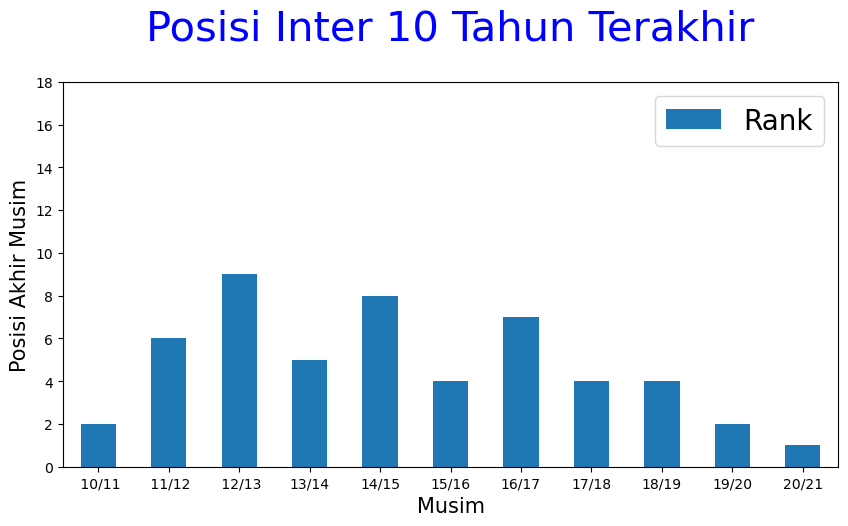

In [37]:
#groupby season, rank
df.groupby('Season')['Rank'].sum().plot(kind='bar')
plt.title('Posisi Inter 10 Tahun Terakhir', loc='center', fontsize=30, pad=30, color='blue')
plt.xlabel('Musim', fontsize=15)
plt.ylabel('Posisi Akhir Musim', fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=20)
plt.xticks(rotation=0)
plt.yticks(np.arange(20, step=2))
plt.gcf().set_size_inches(10, 5)
plt.show()
plt.clf()
plt.cla()
plt.close()

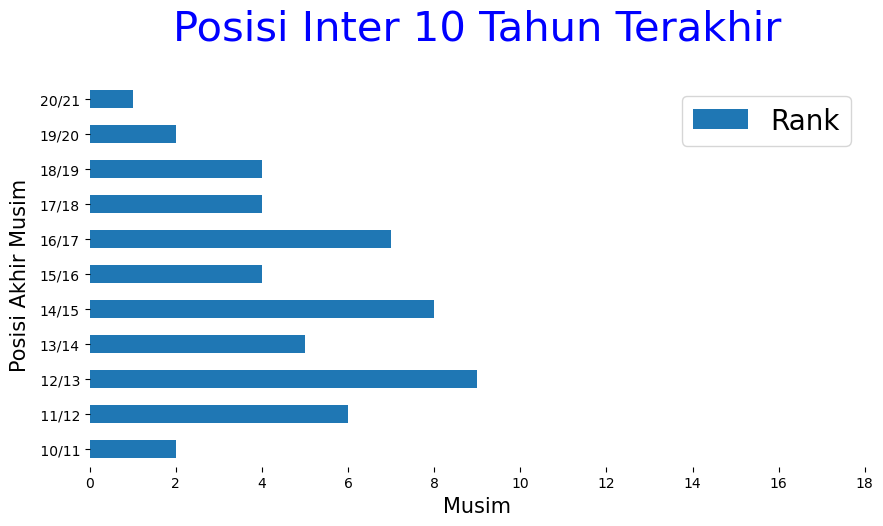

In [38]:
mpl.rc_file_defaults()
#groupby season, rank
df.groupby('Season')['Rank'].sum().plot(kind='barh')
plt.title('Posisi Inter 10 Tahun Terakhir', loc='center', fontsize=30, pad=30, color='blue')
plt.xlabel('Musim', fontsize=15)
plt.ylabel('Posisi Akhir Musim', fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=20)
plt.xticks(rotation=0)
plt.xticks(np.arange(20, step=2))
plt.gcf().set_size_inches(10, 5)
plt.box(False)
plt.show()
plt.clf()
plt.cla()
plt.close()

<Figure size 640x480 with 0 Axes>

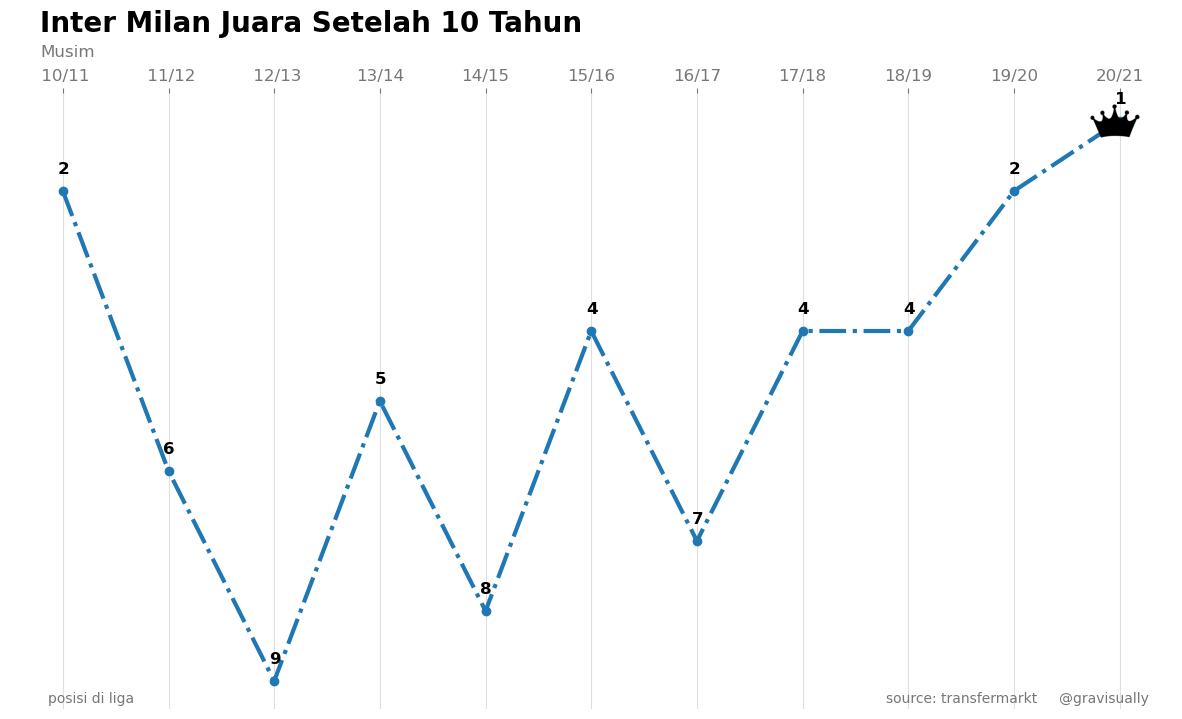

In [39]:
mpl.rc_file_defaults()
plt.figure()
fig, ax = plt.subplots()

xvals = df['Season'].sort_values(ascending=True)
yvals = df['Rank'].groupby(df['Season']).sum()

position = np.arange(len(yvals))


mybars = ax.plot(xvals, yvals, linewidth=3, marker='o', linestyle='-.')
ax.xaxis.set_ticks_position('top') #posisi label (nilai yang bisa dipake :'top', 'bottom', 'both', 'default', 'none')
ax.tick_params(axis='x', colors='#777777', labelsize=12) #label x atau y
plt.xticks(position, xvals)
ax.invert_yaxis()
ax.set_yticks([]) # berfungsi sama seperti plt.yticks([])
ax.grid(which='major', axis='x', linestyle='-', alpha=0.4) # axis untuk menentukan arah grid vertikal atau horizonta
plt.box(False)

for s, d in zip(yvals, np.arange(len(xvals))):
    plt.annotate(s, xy=(d-0.05,s-0.25), color='k', fontsize=12, weight=900)

#menempatkan text di posisi tertentu
ax.text(0.026, 1.1, 'Inter Milan Juara Setelah 10 Tahun', transform=ax.transAxes, size=20, color='black',weight=600) #menempatkan text di posisi tertentu
ax.text(0.026, 1.06, 'Musim', transform=ax.transAxes, size=12, color='#777777') #menempatkan text di posisi tertentu
ax.text(0.98, 0.01, 'source: transfermarkt     @gravisually', transform=ax.transAxes, color='#777777', size=10, ha='right') 
ax.text(0.107, 0.01, 'posisi di liga', transform=ax.transAxes, color='#777777', size=10, ha='right') 

im = plt.imread("inter/crown.png")
newax = fig.add_axes([0.81, 0.82, 0.07, 0.05], anchor='NE')
newax.imshow(im)
newax.axis('off')

plt.gcf().set_size_inches(15, 8)
plt.savefig('inter-10-tahun-line.png', dpi=1200)
plt.show()
plt.clf()
plt.cla()
plt.close()

<Figure size 640x480 with 0 Axes>

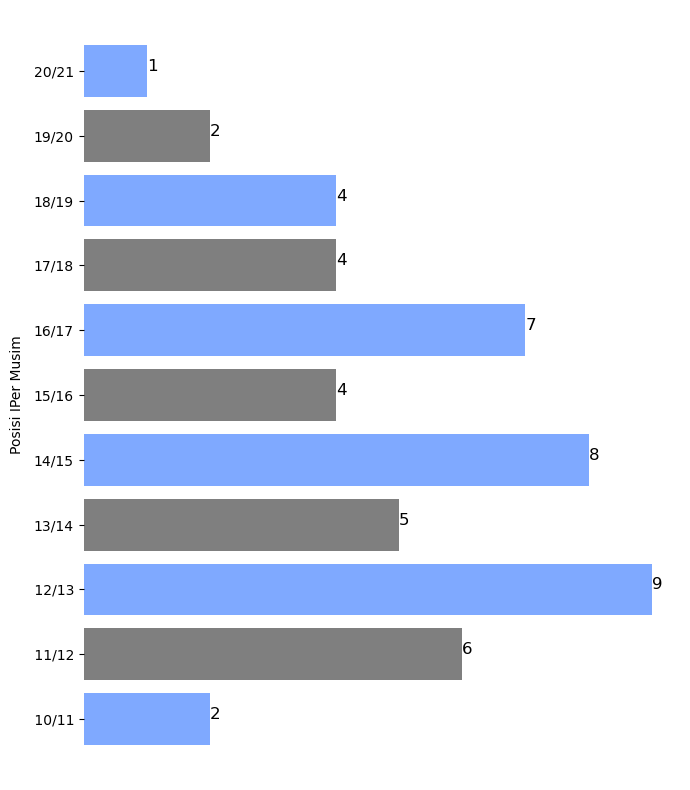

In [40]:
plt.figure()
fig, ax = plt.subplots()

xvals = df['Rank'].groupby(df['Season']).sum()
yvals = df['Season'].sort_values(ascending=True)


mybars = plt.barh(yvals, xvals, align='center', linewidth=0, alpha=.5, color=['#0055ff','black'])
plt.yticks(yvals)

#plt.title('Inter Milan Juara Setelah 10 Tahun', loc='center', pad=30, fontsize=20)
# plt.show()

# plt.show()
# remove all the ticks and directly label each bar with respective value
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off')
# seharusnya pakai code diatas untuk menghilangkan frame namun plt.box(False) lebih simpel


# direct label each bar with Y axis values
'''for bari in mybars:
    height = bari.get_width()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()+0.2, str(int(height)),
                 ha='center', color='black', fontsize=15)'''

for s, d in zip(yvals, xvals):
    plt.annotate(d, xy=(d,s), color='k', fontsize=12)

fig.patch.set_facecolor('white')
plt.ylabel('Posisi IPer Musim')
plt.xticks([])
plt.box(False)
plt.gcf().set_size_inches(7, 8)
plt.tight_layout()
plt.savefig('inter-10-tahun-barh.png', dpi=1200)
#fig.savefig('myimage.svg', format='svg', dpi=1200)
plt.show()
plt.clf()
plt.cla()
plt.close()

In [41]:
x='Season'
y=['W', 'D', 'L']
mr = df.plot(x,y, kind='barh')
plt.clf()
plt.cla()
plt.close()

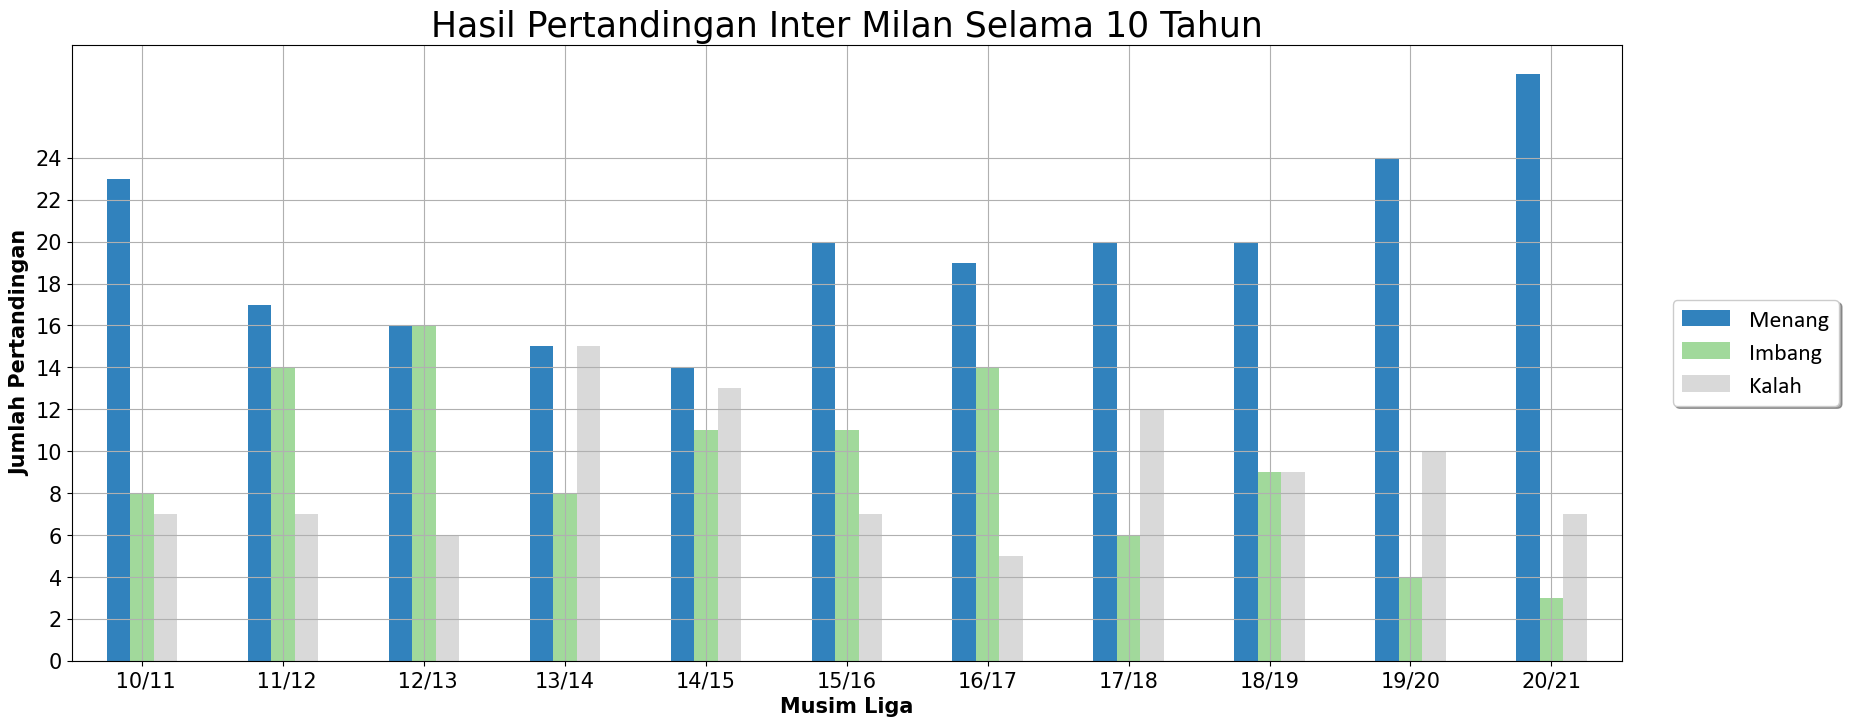

In [42]:
mpl.rc_file_defaults()
#panggil kolom, tentukan x, jenis bar, warna bar
df[['Season','W','L','D']].sort_values(by='Season', ascending=True).plot(x='Season', kind='bar', linewidth=0, cmap='tab20c')

#menentukan judul, label x dan y, legend, yticks, xticks, serta ukuran grafis
plt.title('Hasil Pertandingan Inter Milan Selama 10 Tahun', fontsize=25)
plt.xlabel('Musim Liga', fontsize=15, weight='bold')
plt.ylabel('Jumlah Pertandingan', fontsize=15, weight='bold')
legend = plt.legend(['Menang','Imbang', 'Kalah'],
                    loc = 'center left', 
                    bbox_to_anchor = (1.025,    0.5),
                    shadow=True,
                    prop={'family':'calibri','weight':'roman','size':'xx-large'})
plt.yticks(np.arange(25, step=2), fontsize=15)
plt.xticks(rotation=0, fontsize=15)
plt.gcf().set_size_inches(20, 8)
plt.grid(True)
plt.show()
plt.clf()
plt.cla()
plt.close()

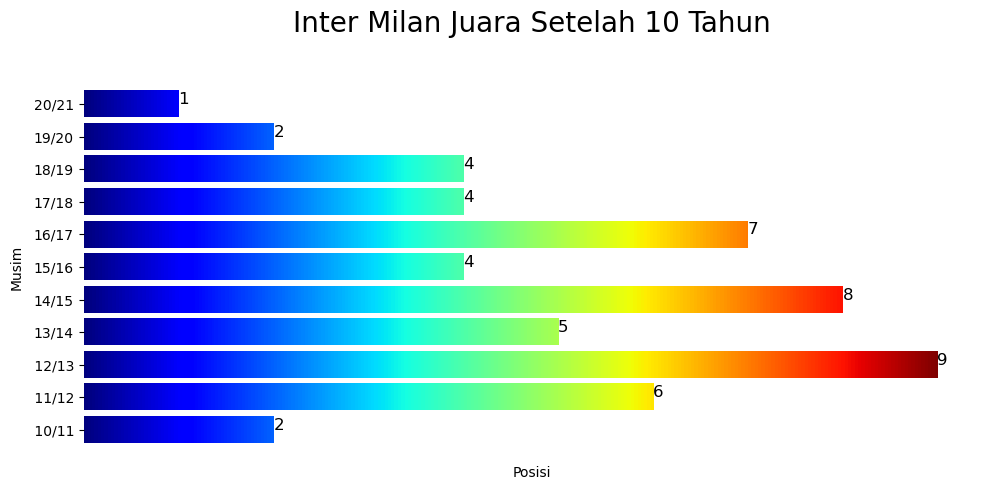

In [43]:
fig, ax = plt.subplots()

xvals = df['Season'].sort_values(ascending=True)
yvals = df['Rank'].groupby(df['Season']).sum()

bars = ax.barh(xvals, yvals)
mpl.rc_file_defaults()

def gradientbars(bars):
      ax = bars[0].axes
      lim = ax.get_xlim()+ax.get_ylim()
      for bar in bars:

          bar.set_zorder(1)
          bar.set_facecolor("none")
          x,y = bar.get_xy()
          w, h = bar.get_width(), bar.get_height()
          grad = np.atleast_2d(np.linspace(0,1*w/max(yvals),256))
          ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0, norm=mpl.colors.NoNorm(vmin=0,vmax=1), cmap=plt.get_cmap('jet'))
      ax.axis(lim)
gradientbars(bars)

position = np.arange(len(xvals))

plt.title('Inter Milan Juara Setelah 10 Tahun', loc='center', pad=30, fontsize=20)

for s, d in zip(xvals, yvals):
    plt.annotate(d, xy=(d,s), color='k', fontsize=12)

plt.ylabel('Musim')
plt.xlabel('Posisi')
plt.xticks([])
plt.box(False)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
#plt.savefig('inter_juara.png')
plt.rcParams['figure.facecolor'] = '#e3ffff'
#fig.savefig('myimage.svg', format='svg', dpi=1200)
plt.show()
plt.clf()
plt.cla()
plt.close()

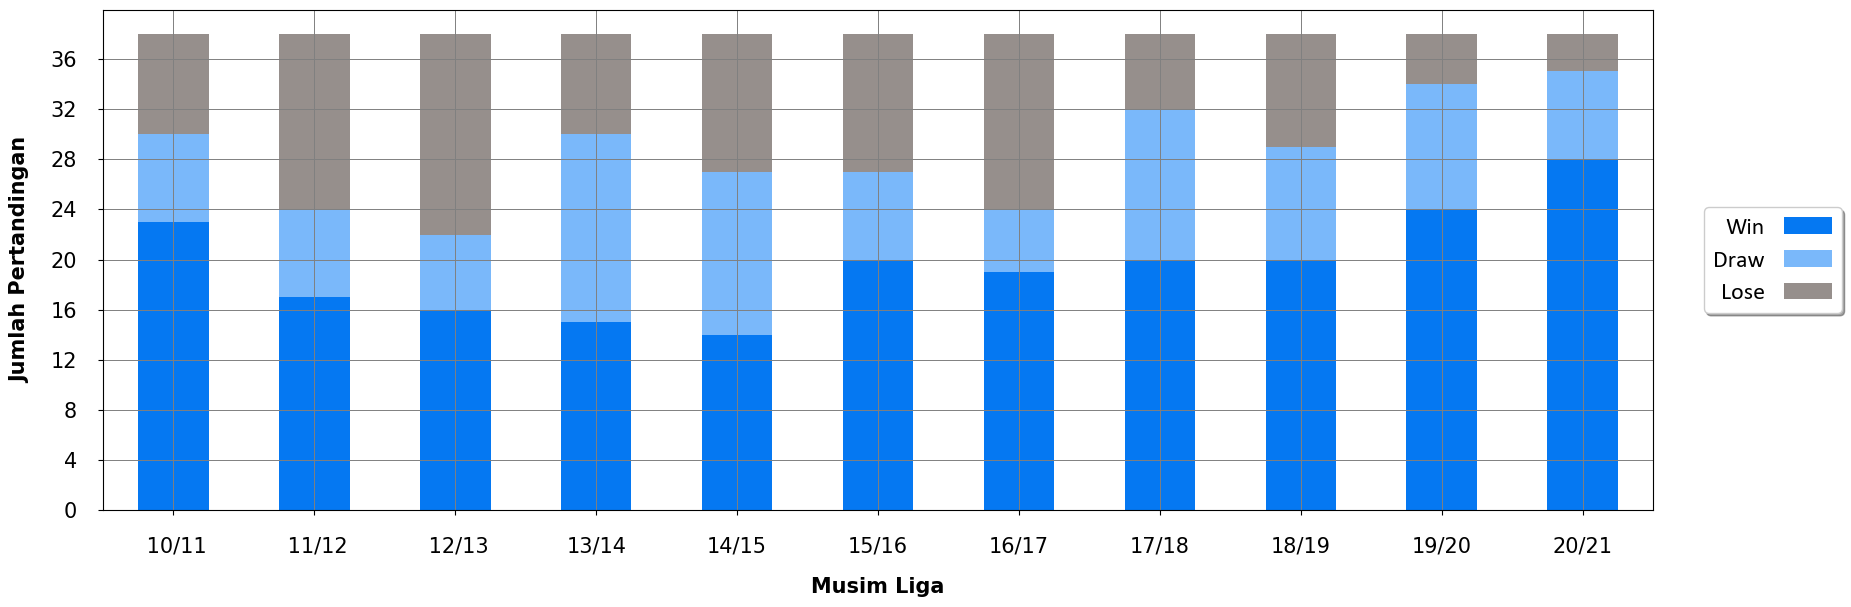

In [44]:
mpl.rc_file_defaults()
#panggil kolom, tentukan x, jenis bar, warna bar
group1= df[['Season','W','D','L']].sort_values(by='Season', ascending=True)
group1.plot(x='Season', 
            kind='bar', 
            stacked=True, 
            linewidth=0, 
            color=['#0578f2','#7ab8fa','#968f8c'])

#menentukan judul, label x dan y, serta legend 
#plt.title('Hasil Pertandingan Inter Milan Selama 10 Tahun', fontsize=25, weight='bold', pad=30)
plt.xlabel('Musim Liga', 
           fontsize=15, 
           weight='bold', 
           labelpad=15)

plt.ylabel('Jumlah Pertandingan', 
           fontsize=15, 
           weight='bold', 
           labelpad=15)

plt.legend(['Win','Draw', 'Lose'],
            loc = 'center left', 
            bbox_to_anchor = (1.025,    0.5),
            shadow=True,
            markerfirst=False,
            prop={'family':'calibri',
                  'weight':'roman',
                  'size':'xx-large'})

#menentukan yticks, xticks, serta ukuran grafis
pos = max(df['W'] + df['L'] + df['D'] + 2)
plt.yticks(np.arange(pos, step=4), fontsize=15)
plt.tick_params(axis='both', which='major', pad=15)
plt.xticks(rotation=0, fontsize=15)
plt.box(True)
plt.gcf().set_size_inches(20, 6.5)
plt.grid(color='gray', linestyle='-', linewidth=0.7, zorder=0)
plt.show()
plt.clf()
plt.cla()
plt.close()

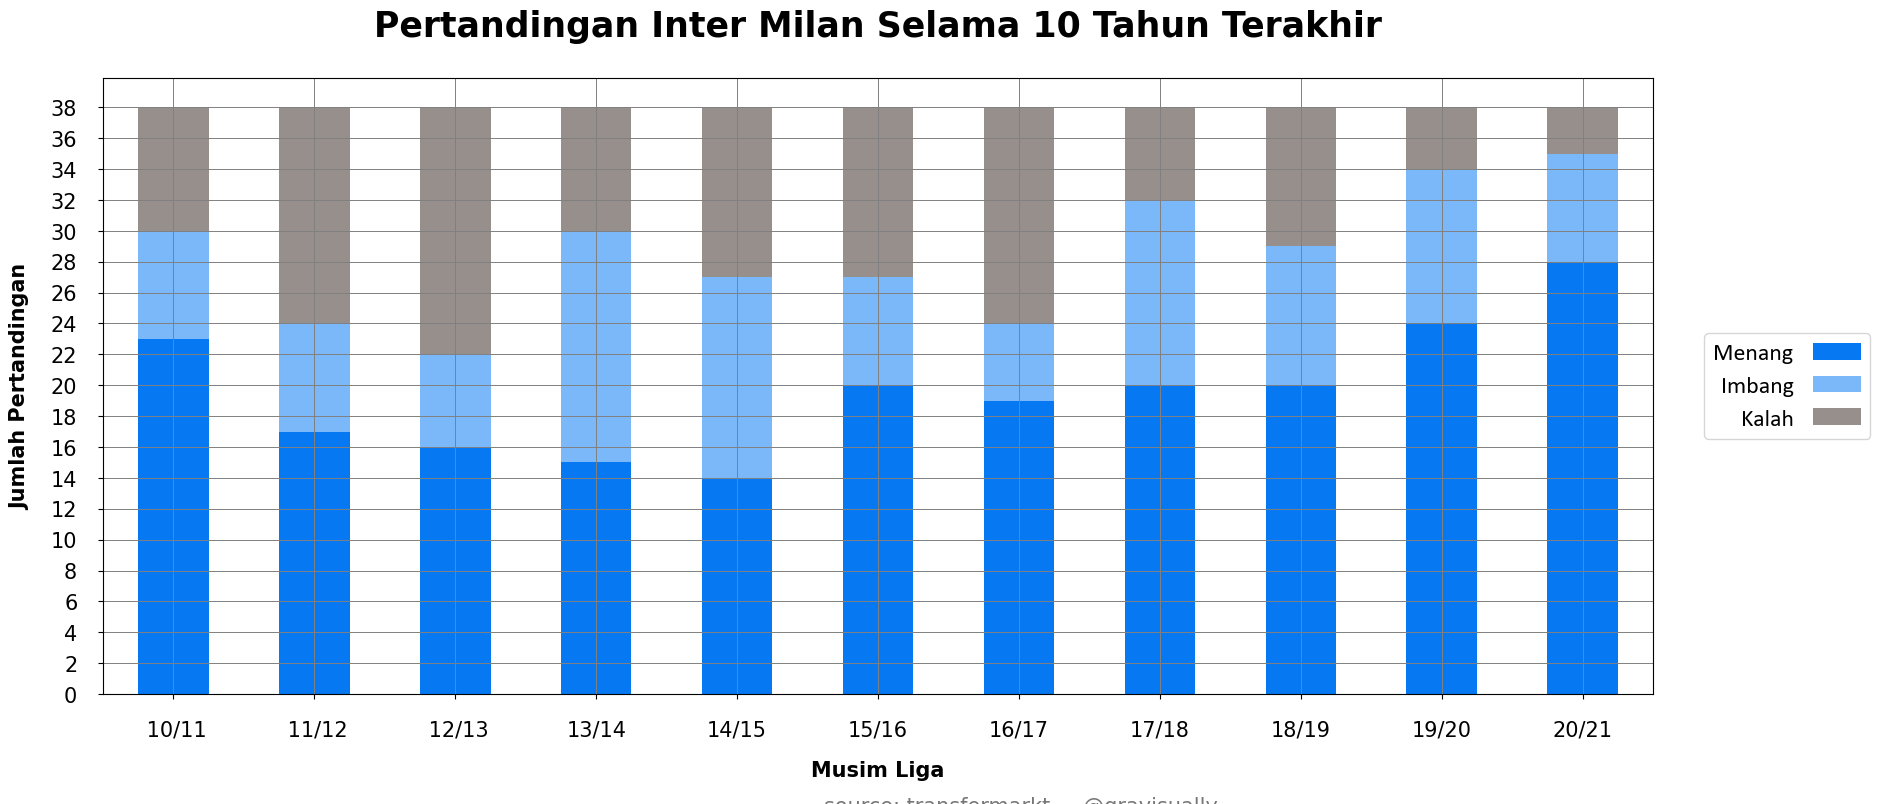

In [47]:
#panggil kolom, tentukan x, jenis bar, warna bar
group1= df[['Season','W','D','L']].sort_values(by='Season', ascending=True)
group1.plot(x='Season', 
            kind='bar', 
            stacked=True, 
            linewidth=0, 
            color=['#0578f2','#7ab8fa','#968f8c'])

#menentukan judul, label x dan y, serta legend 
plt.title('Pertandingan Inter Milan Selama 10 Tahun Terakhir', fontsize=25, weight='bold', pad=30)
plt.xlabel('Musim Liga', 
           fontsize=15, 
           weight='bold', 
           labelpad=15)

plt.ylabel('Jumlah Pertandingan', 
           fontsize=15, 
           weight='bold', 
           labelpad=15)

plt.legend(['Menang','Imbang', 'Kalah'],
            loc = 'center left', 
            bbox_to_anchor = (1.025,    0.5),
            markerfirst=False,
            prop={'family':'calibri',
                  'weight':'roman',
                  'size':'xx-large'})

plt.text(1.26, -0.11, 'source: transfermarkt     @gravisually', transform=ax.transAxes, color='#777777', size=15, ha='right')

#menentukan yticks, xticks, serta ukuran grafis
pos = max(df['W'] + df['L'] + df['D'] + 2)
plt.yticks(np.arange(pos, step=2), fontsize=15)
plt.tick_params(axis='both', which='major', pad=15)
plt.xticks(rotation=0, fontsize=15)
plt.box(True)
plt.gcf().set_size_inches(20, 8)
plt.grid(color='gray', linestyle='-', linewidth=0.7, zorder=0)
plt.savefig('inter-10-tahun-stacked.png', bbox_inches = 'tight', dpi=1200)
plt.show()
plt.clf()
plt.cla()
plt.close()